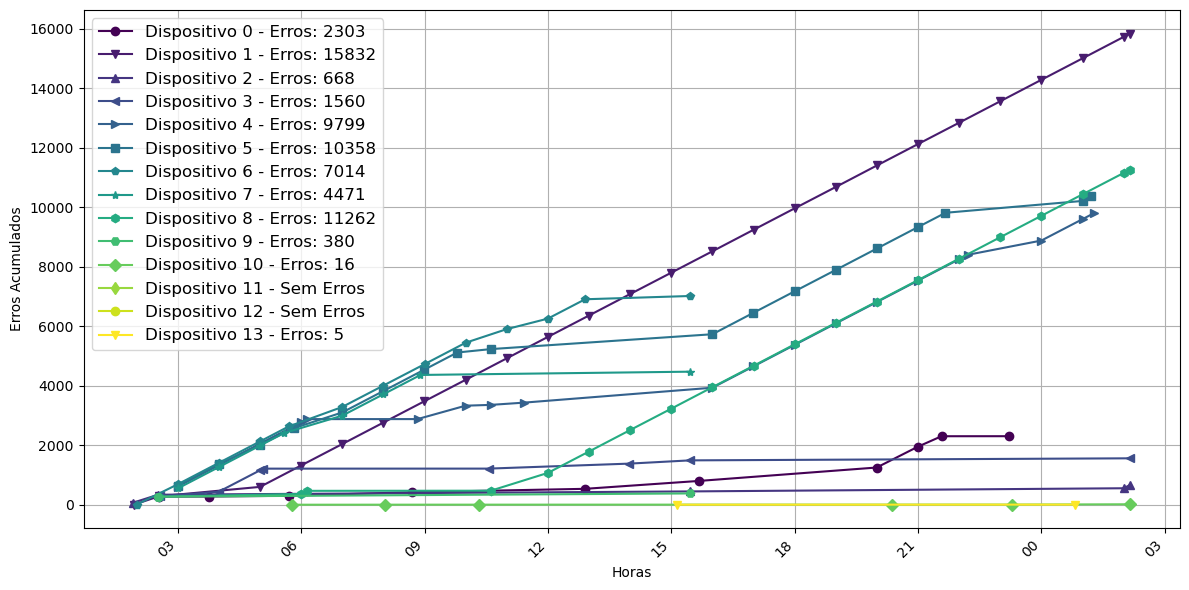

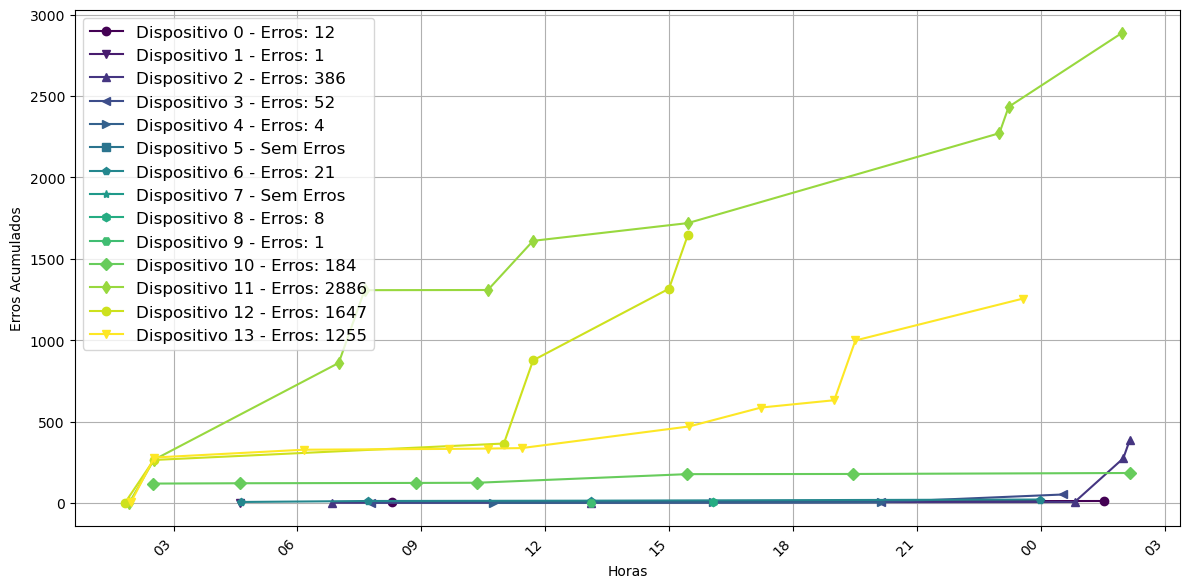

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
import numpy as np
from adjustText import adjust_text

def processar_e_gerar_grafico(caminho_arquivo):
    # Carregando os dados do arquivo CSV
    df = pd.read_csv(caminho_arquivo, sep=";", header=None, names=["dispositivo", "datetime", "erros"])
    df['datetime'] = pd.to_datetime(df['datetime'], unit='ms')

    # Lista dos dispositivos desejados
    dispositivos_selecionados = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

    # Filtrando apenas os dispositivos selecionados
    df = df[df['dispositivo'].isin(dispositivos_selecionados)]

    # Agrupando por dispositivo e intervalo de tempo, pegando o último valor do erro
    df_resampled = df.groupby('dispositivo').resample('60T', on='datetime').last().reset_index(drop=True)

    # Definindo marcadores e cores
    markers = ['o', 'v', '^', '<', '>', 's', 'p', '*', 'h', 'H', 'D', 'd']
    n_markers = len(markers)
    colors = plt.cm.viridis(np.linspace(0, 1, len(dispositivos_selecionados)))

    # Variável de controle para mostrar ou não o total de erros
    mostrar_total_erros = False

    # Criando o gráfico
    plt.figure(figsize=(12, 6))

    # Plotando cada dispositivo no gráfico
    for index, dispositivo in enumerate(sorted(dispositivos_selecionados)):
        grupo = df_resampled[df_resampled['dispositivo'] == dispositivo]
        marker_index = index % n_markers

        if grupo.empty:
            # Plotar 'Sem Erros' se o dispositivo não tiver dados
            plt.plot([], [], linestyle='-', marker=markers[marker_index], color=colors[index],
                     label=f'Dispositivo {dispositivo} - Sem Erros')
        else:
            total_erros = grupo['erros'].max()
            if pd.isnull(total_erros) or total_erros == 0:
                # Plotar 'Sem Erros' se não houver erros registrados
                plt.plot([], [], linestyle='-', marker=markers[marker_index], color=colors[index],
                         label=f'Dispositivo {dispositivo} - Sem Erros')
            else:
                total_erros_str = f'{int(total_erros)}'
                plt.plot(grupo['datetime'], grupo['erros'], linestyle='-', marker=markers[marker_index], color=colors[index],
                         label=f'Dispositivo {dispositivo} - Erros: {total_erros_str}')

                if mostrar_total_erros:
                    ultimo_ponto = grupo.iloc[-1]
                    plt.text(ultimo_ponto['datetime'], ultimo_ponto['erros'], f' {total_erros_str}', verticalalignment='bottom')

    # Configurando títulos e eixos
    plt.title('')
    plt.xlabel('Horas')
    plt.ylabel('Erros Acumulados')
    plt.legend(loc='upper left',fontsize=12)
    plt.grid(True)

    # Ajustando o formato do eixo x
    ax = plt.gca()
    plt.gcf().autofmt_xdate()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
    plt.xticks(rotation=45)

    # Ajustando o layout e salvando o gráfico
    plt.tight_layout()

    # Salvando o gráfico em formato PDF
    caminho_grafico_pdf = os.path.join(os.path.dirname(caminho_arquivo), 'Erros_Dispositivos.pdf')
    plt.savefig(caminho_grafico_pdf, dpi=600)
    
    # Exibir o gráfico e fechar
    plt.show()
    plt.close()

# Lista de endereços de arquivos
caminhos = [
   "C:/Users/Abadio/Desktop/Gráficos/Logs/Graficos_Artigos/grenoble/5 segundos - 7_Experimento_389054/contadorErrosDispositivo.txt",
   "C:/Users/Abadio/Desktop/Gráficos/Logs/Graficos_Artigos/strasbourg/5 segundos - 7_Experimento_389053/contadorErrosDispositivo.txt"
]

# Processar cada arquivo na lista
for caminho in caminhos:
    processar_e_gerar_grafico(caminho)
